In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd

# CSV 파일 경로 설정 (Google Colab에서 업로드된 파일의 경로를 여기에 입력하세요)
file_path = '/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/train.csv'  # 예시로 Google Colab의 파일 경로를 넣었습니다.

# 데이터셋 불러오기
train_data = pd.read_csv(file_path)

# 데이터셋의 기본적인 정보 출력
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

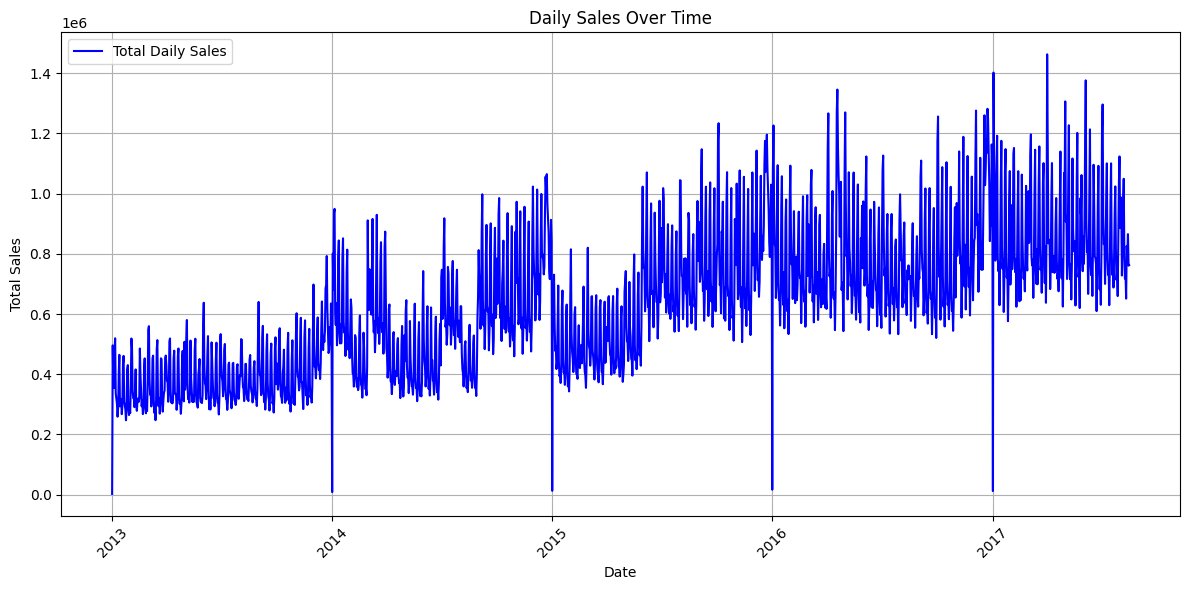

In [ ]:
import matplotlib.pyplot as plt

# 날짜를 datetime 형식으로 변환
train_data['date'] = pd.to_datetime(train_data['date'])

# 날짜별로 매출 합계 계산
daily_sales = train_data.groupby('date')['sales'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Total Daily Sales', color='blue')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

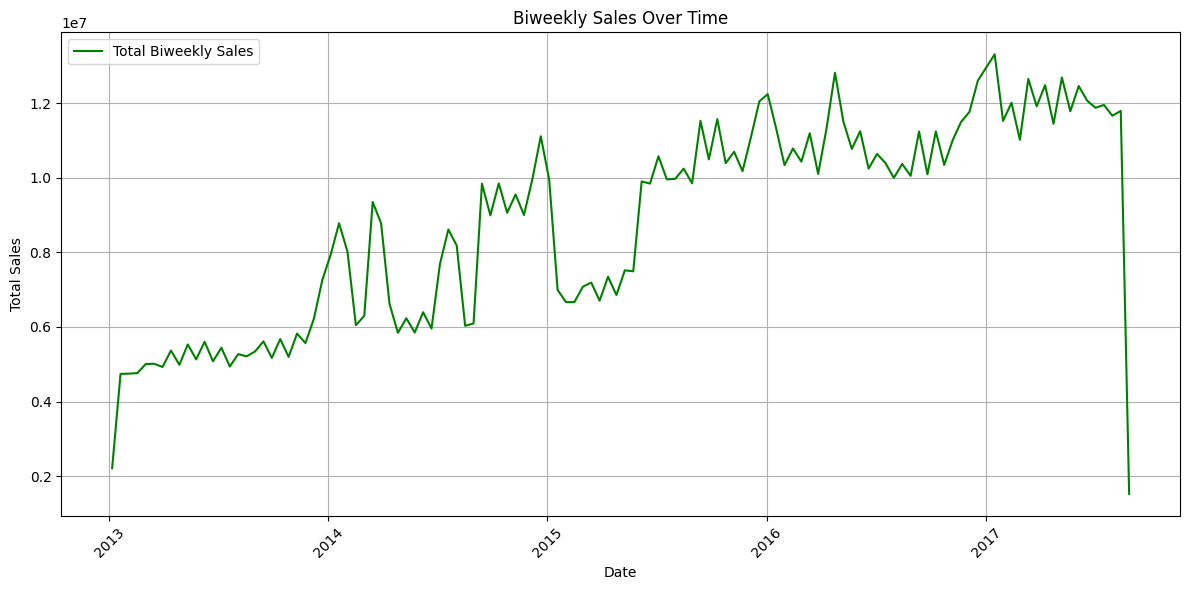

In [ ]:
# 날짜를 datetime 형식으로 변환
train_data['date'] = pd.to_datetime(train_data['date'])

# 날짜별로 매출 합계 계산 (2주 단위로 리샘플링)
biweekly_sales = train_data.resample('2W', on='date')['sales'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(biweekly_sales.index, biweekly_sales.values, label='Total Biweekly Sales', color='green')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Biweekly Sales Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

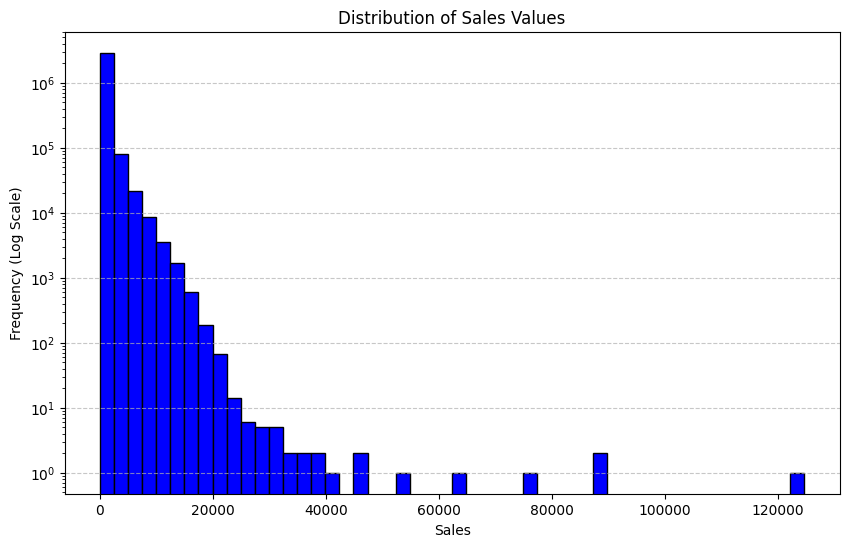

In [ ]:
# 이상치 파악을 위한 그래프
plt.figure(figsize=(10, 6))
plt.hist(train_data['sales'], bins=50, color='blue', edgecolor='black')
plt.yscale('log')  # Use a logarithmic scale for better visualization of outliers
plt.xlabel('Sales')
plt.ylabel('Frequency (Log Scale)')
plt.title('Distribution of Sales Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

0% - 25%: 939,130개의 데이터가 매출 값이 0에서 0 사이에 있습니다.
25% - 50%: 579,684개의 데이터가 매출 값이 0에서 11 사이에 있습니다.
50% - 75%: 731,852개의 데이터가 매출 값이 11에서 195.84725 사이에 있습니다.
75% - 95%: 600,196개의 데이터가 매출 값이 195.84725에서 1965 사이에 있습니다.
95% - 99%: 120,018개의 데이터가 매출 값이 1965에서 5507 사이에 있습니다.
99% - 100%: 30,008개의 데이터가 매출 값이 5507 이상입니다.

상위 1%의 매출 데이터를 제거한 결과, 총 2,970,880개의 데이터가 남았습니다. 변경된 매출 분포의 요약 통계를 보면 최대 매출이 5,507로 줄었으며, 평균 매출은 277.55로 감소했습니다.
제거하기 전 원래 평균 매출은 357.7757이었습니다.

데이터셋에 포함된 매장은 총 54개

In [ ]:
stores_data = pd.read_csv('/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/stores.csv')

# Sum sales by store number
total_sales_by_store = train_data.groupby('store_nbr')['sales'].sum()

# Join with the stores data to have more descriptive information
store_sales_info = stores_data.set_index('store_nbr').join(total_sales_by_store)

# Display the total sales per store with additional store information
store_sales_info_sorted = store_sales_info.sort_values(by='sales', ascending=False)

store_sales_info_sorted

,city,state,type,cluster,sales
store_nbr,,,,,
44,Quito,Pichincha,A,5,6.208755e+07
45,Quito,Pichincha,A,11,5.449801e+07
47,Quito,Pichincha,A,14,5.094831e+07
3,Quito,Pichincha,D,8,5.048191e+07
49,Quito,Pichincha,A,11,4.342010e+07
46,Quito,Pichincha,A,14,4.189606e+07
48,Quito,Pichincha,A,14,3.593313e+07
51,Guayaquil,Guayas,A,17,3.291149e+07
8,Quito,Pichincha,D,8,3.049429e+07


from matplotlib import pyplot as plt
store_sales_info_sorted['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_sales_info_sorted['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
store_sales_info_sorted.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_sales_info_sorted.plot(kind='scatter', x='cluster', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
store_sales_info_sorted['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
store_sales_info_sorted['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(store_sales_info_sorted['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(store_sales_info_sorted, x='cluster', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(store_sales_info_sorted['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(store_sales_info_sorted, x='sales', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

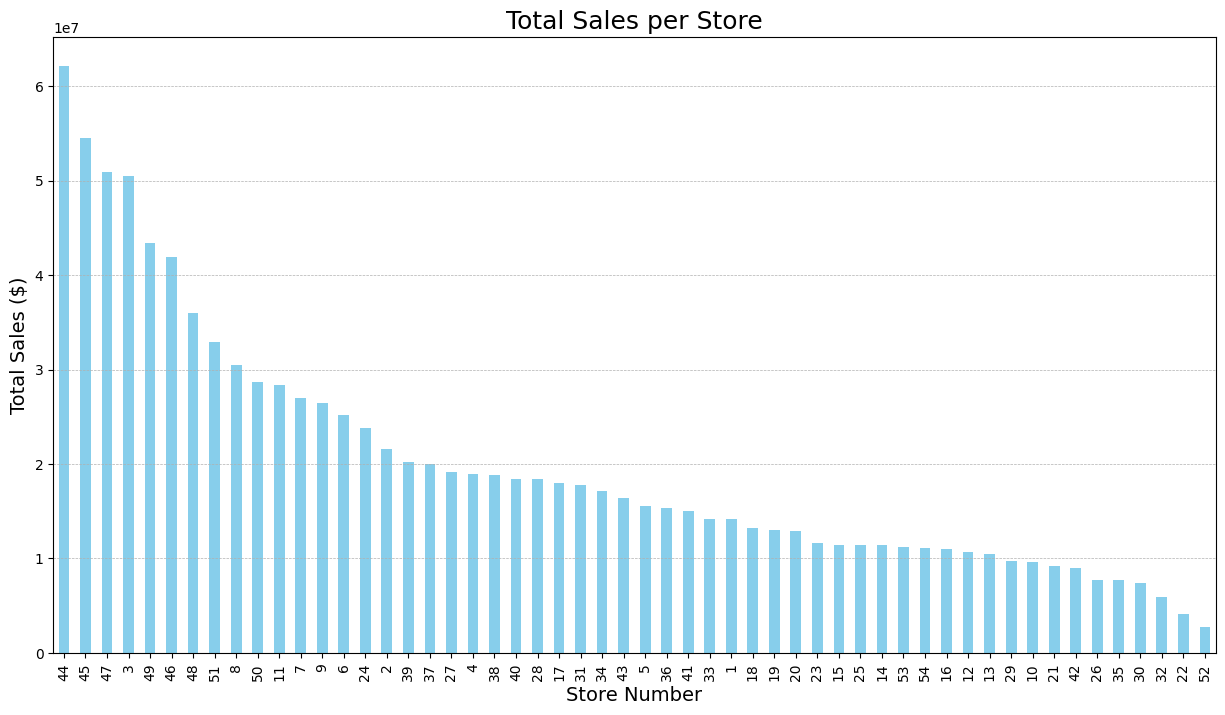

In [ ]:
# Plot total sales per store as a bar chart
plt.figure(figsize=(15, 8))
store_sales_info_sorted['sales'].plot(kind='bar', color='skyblue')
plt.title('Total Sales per Store', fontsize=18)
plt.xlabel('Store Number', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

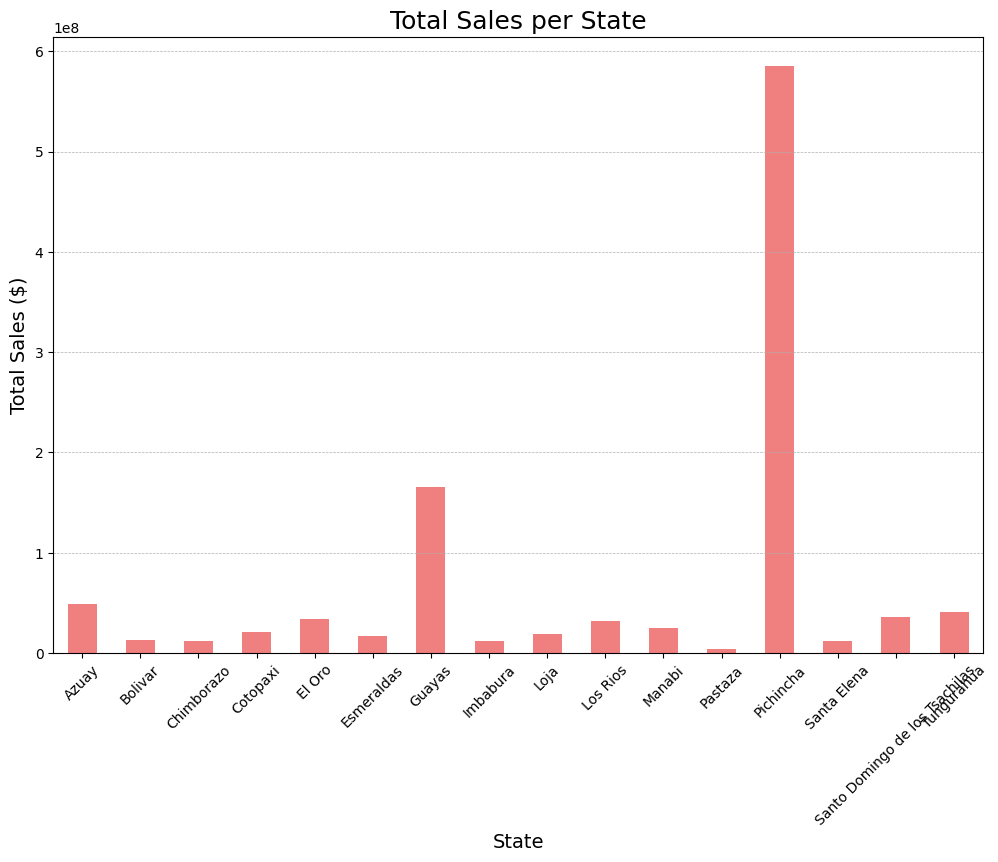

In [ ]:
# Group by state and sum the sales
total_sales_by_state = store_sales_info_sorted.groupby('state')['sales'].sum()

# Plot total sales per state as a bar chart
plt.figure(figsize=(12, 8))
total_sales_by_state.plot(kind='bar', color='lightcoral')
plt.title('Total Sales per State', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
# Count the number of stores per state
store_count_by_state = store_sales_info_sorted.groupby('state').size()

# Calculate the average sales per store in each state
average_sales_by_state = total_sales_by_state / store_count_by_state

# Create a summary DataFrame for clarity
state_summary = pd.DataFrame({
    'Total Stores': store_count_by_state,
    'Total Sales ($)': total_sales_by_state,
    'Average Sales per Store ($)': average_sales_by_state
})

state_summary

,Total Stores,Total Sales ($),Average Sales per Store ($)
state,,,
Azuay,3,4.916860e+07,1.638953e+07
Bolivar,1,1.304951e+07,1.304951e+07
Chimborazo,1,1.138792e+07,1.138792e+07
Cotopaxi,2,2.118226e+07,1.059113e+07
El Oro,2,3.338680e+07,1.669340e+07
Esmeraldas,1,1.639169e+07,1.639169e+07
Guayas,11,1.651544e+08,1.501404e+07
Imbabura,1,1.145127e+07,1.145127e+07
Loja,1,1.886000e+07,1.886000e+07


from matplotlib import pyplot as plt
_df_0['Total Stores'].plot(kind='hist', bins=20, title='Total Stores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total Sales ($)'].plot(kind='hist', bins=20, title='Total Sales ($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Average Sales per Store ($)'].plot(kind='hist', bins=20, title='Average Sales per Store ($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Total Stores', y='Total Sales ($)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Total Sales ($)', y='Average Sales per Store ($)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Total Stores'].plot(kind='line', figsize=(8, 4), title='Total Stores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Total Sales ($)'].plot(kind='line', figsize=(8, 4), title='Total Sales ($)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Average Sales per Store ($)'].plot(kind='line', figsize=(8, 4), title='Average Sales per Store ($)')
plt.gca().spines[['top', 'right']].set_visible(False)

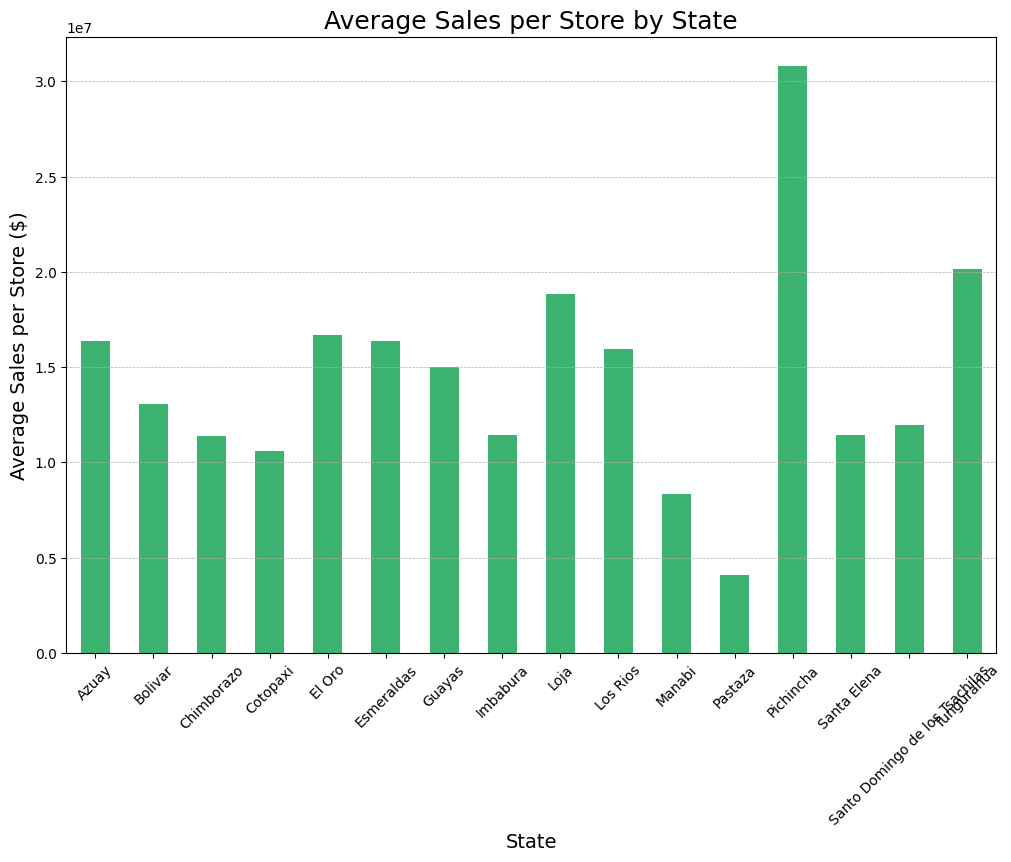

In [ ]:
# Plot average sales per store by state as a bar chart
plt.figure(figsize=(12, 8))
average_sales_by_state.plot(kind='bar', color='mediumseagreen')
plt.title('Average Sales per Store by State', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Sales per Store ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()


In [ ]:
oil_data = pd.read_csv('/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/oil.csv')

# Convert date columns to datetime objects for merging
train_data['date'] = pd.to_datetime(train_data['date'])
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Sum sales by date across all stores to get total daily sales
daily_sales = train_data.groupby('date')['sales'].sum()

# Merge the daily sales data with oil data based on the date
merged_data = pd.merge(daily_sales, oil_data, on='date', how='left')

# Display the first few rows of the merged dataset
merged_data.head()

,date,sales,dcoilwtico
0,2013-01-01,2511.618999,NaN
1,2013-01-02,496092.417944,93.14
2,2013-01-03,361461.231124,92.97
3,2013-01-04,354459.677093,93.12
4,2013-01-05,477350.121229,NaN


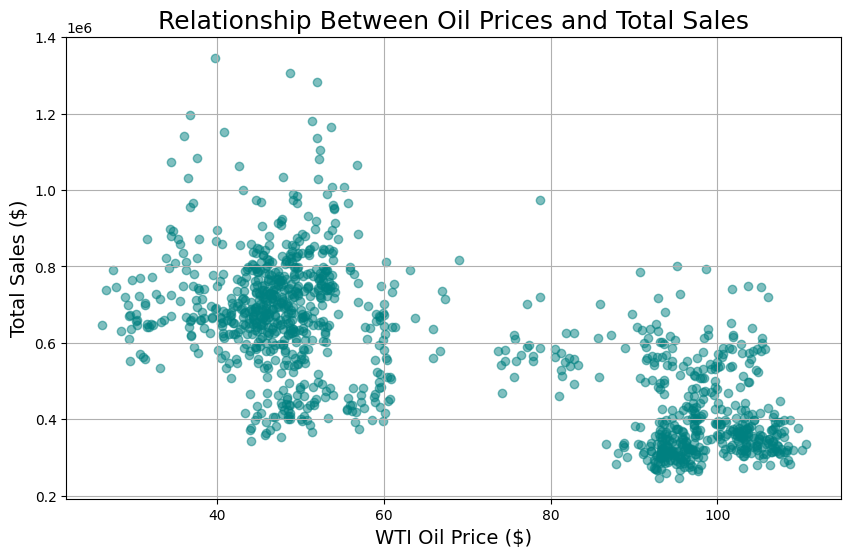

(None, -0.7050015324800484)

In [ ]:
# Drop rows with missing oil data
merged_data_clean = merged_data.dropna(subset=['dcoilwtico'])

# Calculate the correlation between oil prices and sales
correlation = merged_data_clean['sales'].corr(merged_data_clean['dcoilwtico'])

# Plot the relationship between oil prices and sales
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_clean['dcoilwtico'], merged_data_clean['sales'], alpha=0.5, color='teal')
plt.title('Relationship Between Oil Prices and Total Sales', fontsize=18)
plt.xlabel('WTI Oil Price ($)', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.grid(True)

plt.show(), correlation

In [ ]:
# oil 데이터셋 전처리

# Load the uploaded oil data
oil_data_path = '/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/oil.csv'
oil_data = pd.read_csv(oil_data_path)

# Check for missing values
missing_values = oil_data.isnull().sum()
missing_values

# Fill missing values with the previous value in 'dcoilwtico' column
oil_data_filled = oil_data.fillna(method='ffill')

# Recheck for missing values to ensure all have been filled
missing_values_after_filling = oil_data_filled.isnull().sum()
oil_data_filled.head(), missing_values_after_filling

# Fill the remaining missing value at the beginning of the dataset with the next valid observation
oil_data_filled.fillna(method='bfill', inplace=True)

# Save the filled data to a new CSV file
filled_oil_data_path = '/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/oil_pre.csv'
oil_data_filled.to_csv(filled_oil_data_path, index=False)


In [ ]:
# Calculate the number and percentage of cases where sales are zero
zero_sales_count = data[data['sales'] == 0].shape[0]
total_count = data.shape[0]
zero_sales_percentage = (zero_sales_count / total_count) * 100

zero_sales_count, zero_sales_percentage

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of zero sales entries for each store number
zero_sales_per_store = data[data['sales'] == 0].groupby('store_nbr').size()

# Plot the results
plt.figure(figsize=(12, 6))
zero_sales_per_store.plot(kind='bar', color='skyblue')
plt.title('Number of Zero Sales Entries per Store')
plt.xlabel('Store Number')
plt.ylabel('Count of Zero Sales Entries')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load the uploaded data
data_path = '/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/train.csv'
data = pd.read_csv(data_path)

# Filter data for 'Grocery 1' family across all stores
grocery_data = data[data['family'] == 'GROCERY I']

# Group by store and check for continuous zero sales
from itertools import groupby

# Function to calculate continuous zero sales stretches
def calculate_zero_stretches(group):
    group['zero_stretch'] = (group['sales'] == 0).astype(int).groupby(group['sales'].ne(0).cumsum()).cumcount() + 1
    return group

# Apply the function to each store group
grocery_grouped = grocery_data.groupby('store_nbr').apply(calculate_zero_stretches)

# Find maximum stretch of zeros for each store
max_zero_stretches = grocery_grouped.groupby('store_nbr')['zero_stretch'].max().reset_index()

max_zero_stretches.head(), grocery_grouped.head()


In [ ]:
import matplotlib.pyplot as plt

# Plot the maximum stretches of zero sales for each store
plt.figure(figsize=(14, 6))
plt.bar(max_zero_stretches['store_nbr'], max_zero_stretches['zero_stretch'], color='skyblue')
plt.xlabel('Store Number')
plt.ylabel('Maximum Continuous Days with Zero Sales')
plt.title('Maximum Continuous Days with Zero Sales for Grocery 1 Across Stores')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [ ]:
# Check the specific store 52 for continuous zero sales details
store_52_data = grocery_grouped[grocery_grouped['store_nbr'] == 52]

# Calculate continuous stretches of zero sales in store 52
store_52_zero_stretches = store_52_data[store_52_data['sales'] == 0]

# Check for long stretches of zero sales
long_zero_stretches_store_52 = store_52_zero_stretches['zero_stretch'].max()

long_zero_stretches_store_52, store_52_zero_stretches.head()


In [ ]:
# 각 매장과 제품군별로 데이터 그룹화 및 제로 판매 일수 계산 적용
grouped_data = data.groupby(['store_nbr', 'family']).apply(calculate_zero_stretches)

# 3일 이상 연속 제로 판매 데이터 제거
filtered_data = grouped_data[grouped_data['zero_stretch'] < 3]

# 필터링된 데이터를 CSV 파일로 저장
filtered_data.to_csv('train_pre.csv', index=False)

# 파일 다운로드
files.download('/content/drive/MyDrive/Dev_course/3차 팀 프로젝트/train_pre.csv')